In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
from scipy.stats import lognorm

pysqldf = lambda q: sqldf(q, globals())

In [3]:
folder = "../dataset/"
#basic_stats
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#customer_zipcodes
names=['zipcode','date','category','zipcodecustomer','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
customer_zipcodes = pd.io.parsers.read_table(folder + 'customer_zipcodes000',sep='\t', names=names, parse_dates=["date"])

#age distribution
names=['zipcode','date','category','ageinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
age_distribution = pd.io.parsers.read_table(folder + 'age_distribution000',sep='\t', names=names, parse_dates=["date"])

#gender distribution
names=['zipcode','date','category','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
gender_distribution = pd.io.parsers.read_table(folder + 'gender_distribution000',sep='\t', names=names, parse_dates=["date"])

#payment_distribution 
names=['zipcode','date','category','paymentinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
payment_distribution = pd.io.parsers.read_table(folder + 'payment_distribution000',sep='\t', names=names, parse_dates=["date"])

#demographic distribution
names=['zipcode','date','category','ageinterval','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
demographic_distribution = pd.io.parsers.read_table(folder + 'demographic_distribution000',sep='\t', names=names, parse_dates=["date"])

#expenditure-time_curve
names=['zipcode','date','day_of_week','hour','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
expenditure_time_curve = pd.io.parsers.read_table(folder + 'expenditure-time_curve000',sep='\t', names=names, parse_dates=["date"])


basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

customer_zipcodes["amount"] = customer_zipcodes["payment"]* customer_zipcodes["avg"]
customer_zipcodes["avgpaybymerch"] = customer_zipcodes["payment"]/ customer_zipcodes["merchant"]
customer_zipcodes["amountbymerch"] = customer_zipcodes["amount"]/ customer_zipcodes["merchant"]
customer_zipcodes["avgReppays"] = customer_zipcodes["payment"] / customer_zipcodes["card"]
customer_zipcodes["weekday"] = customer_zipcodes["date"].map(lambda d: (d.weekday()))
customer_zipcodes["day"] = customer_zipcodes["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

age_distribution["amount"] = age_distribution["payment"]* age_distribution["avg"]
gender_distribution["amount"] = gender_distribution["payment"]* payment_distribution["avg"]
payment_distribution["amount"] = payment_distribution["payment"]* payment_distribution["avg"]
demographic_distribution["amount"] = demographic_distribution["payment"]* demographic_distribution["avg"]
expenditure_time_curve["amount"] = expenditure_time_curve["payment"]* expenditure_time_curve["avg"]

In [48]:
basic_stats.ix[3]

zipcode                         8001
date             2014-07-01 00:00:00
category                     es_food
merchant                          22
card                              62
payment                           66
avg                            13.58
max                            40.43
min                              1.1
std                         8.146661
amount                        896.28
avgpaybymerch                      3
amountbymerch                  40.74
avgReppays                  1.064516
weekday                            1
day                           01-Tue
Name: 3, dtype: object

3.04066125978 0.942365283941 1606.21529223


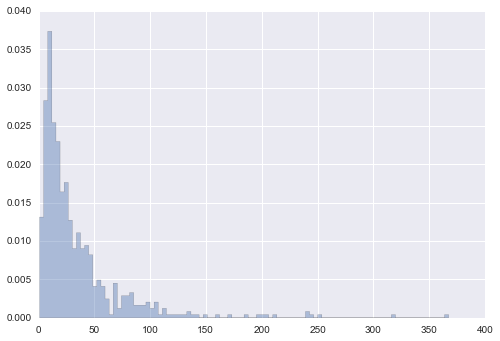

33.9211620329 367.409142816 0.882230937959 39.529255633 22557.5727519
0.411162032935 67.1491428157 -0.117769062041 273.422751902
99.9%:  (0.9415602890249789, 464.76849314886289)


In [9]:
#payment	avg	max	min	std	amount
#313	32.21	199.00	3.0	25.875962	10081.73	
row=425

avg=basic_stats["avg"][row]
std=basic_stats["std"][row]
num=basic_stats["payment"][row]

var=std*std
sigma2=np.log(1+(var/(avg*avg)))
sigma =np.sqrt(sigma2)
mu = np.log(avg)-(.5*sigma) 
print mu, sigma, var

fig, ax = plt.subplots(1, 1)
r = lognorm.rvs(sigma, loc=0,scale=np.exp(mu), size=num)
ax.hist(r,  bins=100,normed=True, histtype='stepfilled', alpha=0.4)
ax.legend(loc='best', frameon=False)
plt.show()
print r.mean(),r.max(), r.min(), r.std(), r.sum()
print r.mean()-avg,r.max()-basic_stats["max"][row], r.min()-basic_stats["min"][row], r.sum()-basic_stats["amount"][row]


shape = sigma # Scipy's shape parameter
scale = np.exp(mu) # Scipy's scale parameter

print "99.9%: ", lognorm.interval(0.999, shape, loc=0, scale=scale)

In [12]:
def LogNormbyAvgStdNum(row):
    
    avg=row["avg"]
    std=row["std"]
    num=row["payment"]

    var=std*std
    sigma2=np.log(1+(var/(avg*avg)))
    sigma =np.sqrt(sigma2)
    mu = np.log(avg)-(.5*sigma)
    
    r = lognorm.rvs(sigma, loc=0,scale=np.exp(mu), size=num)
    return r
    

In [52]:
LogNormbyAvgStdNum(basic_stats.ix[2])

array([  40.90198491,   15.10042565,   49.55606669,   30.96754611,
         10.80776482,   20.71998047,   12.1887295 ,    9.04185136,
         11.09292226,   44.68578013,   11.00767928,   19.8800187 ,
          8.83740323,    6.93203117,   57.40595332,   33.22342439,
         24.93387136,   16.0925656 ,   30.28138883,   14.52572395,
         36.9707531 ,    3.23189925,   26.88835145,   14.42835183,
          9.99963301,   20.65081105,   14.91500503,    9.80392887,
         66.30510616,   39.1711807 ,    5.19712557,   37.85492473,
         14.23151016,   32.17960408,   16.56382626,   20.06622706,
         64.87505872,   21.17560253,   34.72650793,   35.2396231 ,
         37.3232008 ,   12.64128749,   56.91378205,   48.55481935,
         59.3475913 ,   37.77723077,   24.69509946,   27.74103753,
          8.70135433,   68.12430289,   38.70208362,    8.58235329,
          9.15368386,   43.821896  ,   18.87240676,   25.13259618,
         35.24943525,   10.37563171,   24.4663001 ,   29.65890

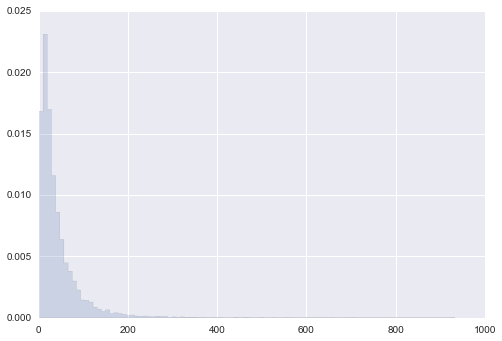

In [53]:
row=323

fig, ax = plt.subplots(1, 1)
ax.hist(LogNormbyAvgStdNum(basic_stats.ix[323]),  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
#basic_stats["distribution"] = basic_stats.apply(func = LogNormbyAvgStdNum, axis=1) don't work
basic_stats["distribution"] = ""
for i in basic_stats.index:
    basic_stats["distribution"][i] = LogNormbyAvgStdNum(basic_stats.ix[i])

In [10]:
cut100basic_stats = basic_stats[:100]

In [13]:
cut100basic_stats["distribution"] = ""
for i in cut100basic_stats.index:
    cut100basic_stats["distribution"][i] = LogNormbyAvgStdNum(cut100basic_stats.ix[i])

/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/x/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

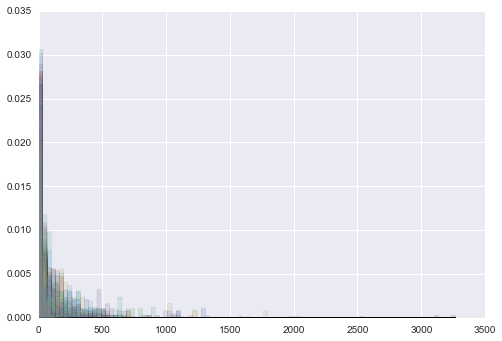

In [16]:

fig, ax = plt.subplots(1, 1)
ax.hist(cut100basic_stats["distribution"],  bins=100,normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()